In [13]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from data_cleaning import *
import implementations as imp
import plots
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

COLUMN_TO_DROP = 22

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import data

In [14]:
y_train, x_train, ids_train = load_csv_data("../data/train.csv")
y_test, x_test, ids_test = load_csv_data("../data/test.csv")

# Clean and add features

In [15]:
PRI_jet_num = np.array([x_train[:, COLUMN_TO_DROP]])
print(PRI_jet_num.shape)
del_x_train = np.delete(x_train, COLUMN_TO_DROP, axis=1)
print(del_x_train.shape)

print()

replaced_x_train = replace_undefined(del_x_train, UNDEFINED_VALUE, 0.0)
poly_x_train = create_poly_features(replaced_x_train, 3)
print(poly_x_train[0][0])
print(poly_x_train.shape)

print()

norm_x_train, train_data_mean, train_data_std = mean_std_normalization(poly_x_train)
print(norm_x_train[0][0])
print(norm_x_train.shape)

print()

new_x_train = np.concatenate((norm_x_train, PRI_jet_num.T), axis=1)
print(new_x_train.shape)

(1, 250000)
(250000, 29)

138.47
(250000, 87)

0.4986371179215161
(250000, 87)

(250000, 88)


In [16]:
PRI_jet_num = np.array([x_test[:, COLUMN_TO_DROP]])
print(PRI_jet_num[0:5])
print(PRI_jet_num.shape)
del_x_test = np.delete(x_test, COLUMN_TO_DROP, axis=1)
print(del_x_train.shape)

replaced_x_test = replace_undefined(del_x_test, UNDEFINED_VALUE, 0.0)
poly_x_test = create_poly_features(replaced_x_test, 3)
print(poly_x_test[0][0])
print(poly_x_test.shape)

norm_x_test, test_data_mean, test_data_std = mean_std_normalization(poly_x_test, train_data_mean, train_data_mean)
print(norm_x_test[0][0])
print(norm_x_test.shape)

new_x_test = np.concatenate((norm_x_test, PRI_jet_num.T), axis=1)
print(new_x_test.shape)

[[0. 1. 0. ... 0. 1. 0.]]
(1, 568238)
(250000, 29)
0.0
(568238, 87)
-1.0096823731792868
(568238, 87)
(568238, 88)


# The model

In [17]:
gamma = 0.1
max_iters = 100
initial_w = np.zeros(new_x_train.shape[1], dtype=np.float64)

rg_loss, best_rg_weight = imp.logistic_regression(y_train, new_x_train, initial_w, max_iters, gamma)

Loss in iteration 1: 17328.679513999832
Loss in iteration 2: -1157073616.2864199
Loss in iteration 3: -1672128359.2794793
Loss in iteration 4: -2165058018.769342
Loss in iteration 5: -2677245287.927182
Loss in iteration 6: -3216304434.011258
Loss in iteration 7: -3760027222.0398397
Loss in iteration 8: -4235130705.5171766
Loss in iteration 9: -4699044300.497144
Loss in iteration 10: -5216186642.481486
Loss in iteration 11: -5751836380.879677
Loss in iteration 12: -6335425217.684056
Loss in iteration 13: -6705956249.293177
Loss in iteration 14: -7489448556.184426
Loss in iteration 15: -7901414209.414214
Loss in iteration 16: -8351302839.240653
Loss in iteration 17: -9054453820.503456
Loss in iteration 18: -9287567369.606379
Loss in iteration 19: -9898433650.175
Loss in iteration 20: -10618522590.823956
Loss in iteration 21: -10861796524.294731
Loss in iteration 22: -11325080549.496714
Loss in iteration 23: -11902402114.256025
Loss in iteration 24: -12615540532.925943
Loss in iteration 2

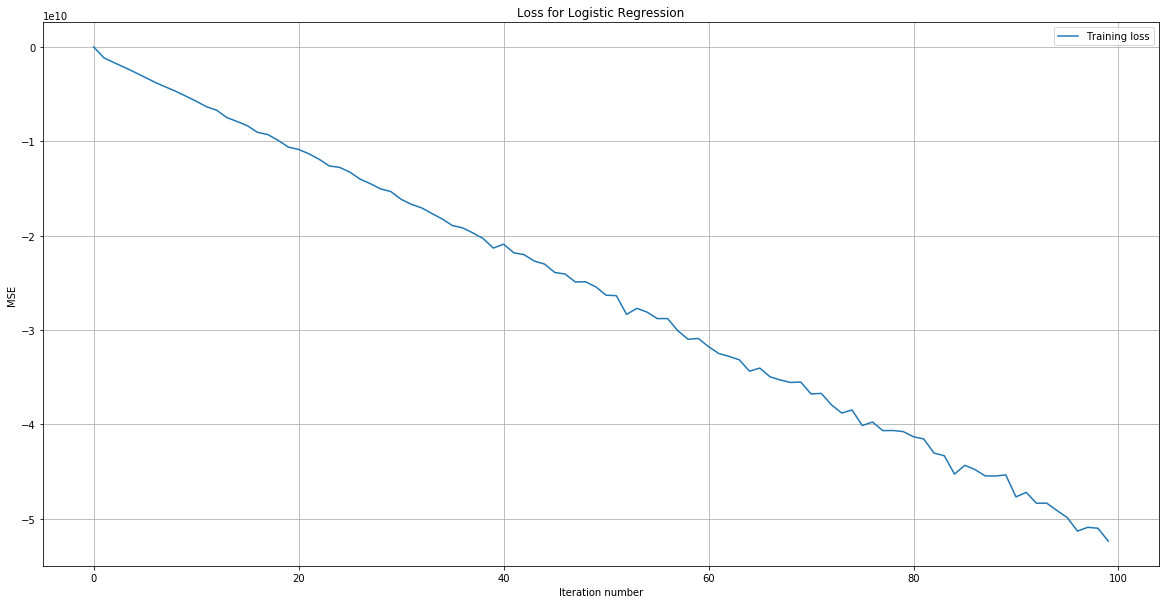

In [18]:
# Plot
plt.subplots(figsize=(20,10))
plt.plot(rg_loss)
plt.legend(["Training loss"])
plt.grid()
plt.title("Loss for Logistic Regression")
plt.xlabel("Iteration number")
plt.ylabel("MSE")
plt.show()

# Testing

In [19]:
y_pred = predict_labels(best_rg_weight[-1], new_x_test)
n = len(y_pred)
correct = 0
for i in range(n):
    if (y_pred[i] == y_test[i]):
        correct += 1
print(str(correct) + " of " + str(n) + " correct, precentage: " + str(correct/n)) 

527317 of 568238 correct, precentage: 0.9279861607284272


## Hva kan vi cross validate?
- Degrees, hvor mange degrees ska vi legge til i den polynomiske utvidelsen av dataen vår?
- Lambda, for ridge regression og og den andre logistic regressionene
- Gamma, learning rate